In [2]:
!pip install prophet pandas matplotlib seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet


In [4]:
# Create dummy sales data
dates = pd.date_range(start='2022-01-01', periods=200)
sales = 200 + 10 * np.sin(np.linspace(0, 20, 200)) + np.random.normal(0, 10, 200)

df = pd.DataFrame({'Date': dates, 'Sales': sales})
df.to_csv('sales_data.csv', index=False)
df.head()


,Date,Sales
0,2022-01-01,204.707066
1,2022-01-02,198.086775
2,2022-01-03,190.394955
3,2022-01-04,194.240029
4,2022-01-05,196.787153


In [5]:
data = df[['Date', 'Sales']].copy()
data.columns = ['ds', 'y']
data['ds'] = pd.to_datetime(data['ds'])
data.head()


,ds,y
0,2022-01-01,204.707066
1,2022-01-02,198.086775
2,2022-01-03,190.394955
3,2022-01-04,194.240029
4,2022-01-05,196.787153


In [6]:
model = Prophet()
model.fit(data)


23:48:44 - cmdstanpy - INFO - Chain [1] start processing
23:48:45 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
future = model.make_future_dataframe(periods=30)  # predict next 30 days
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
225,2022-08-14,196.675337,179.091441,214.262610
226,2022-08-15,193.543711,176.550213,213.001934
227,2022-08-16,196.965756,179.086319,214.941528
228,2022-08-17,195.423812,179.714358,213.365242
229,2022-08-18,193.702804,175.878005,211.138971


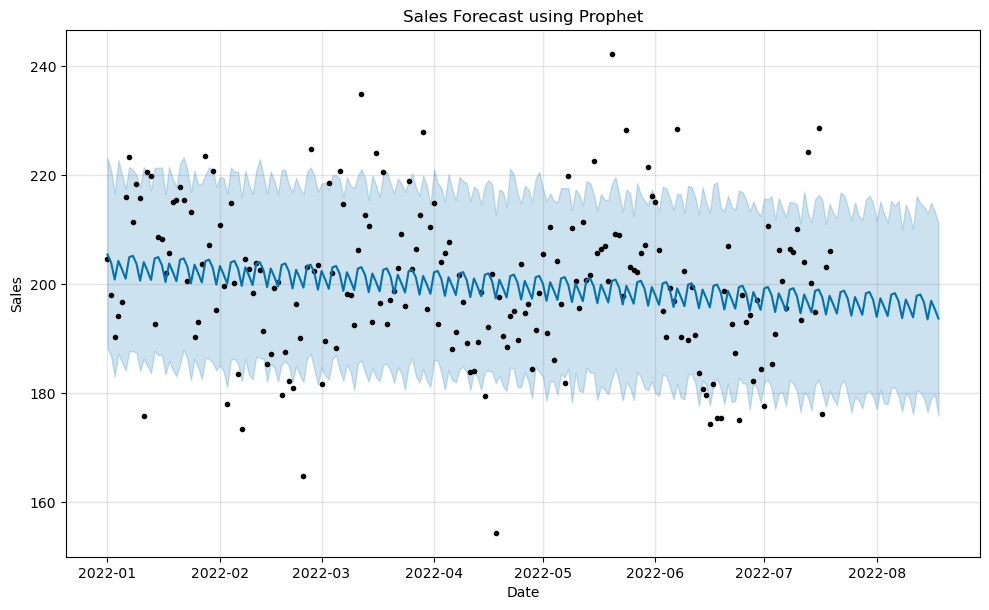

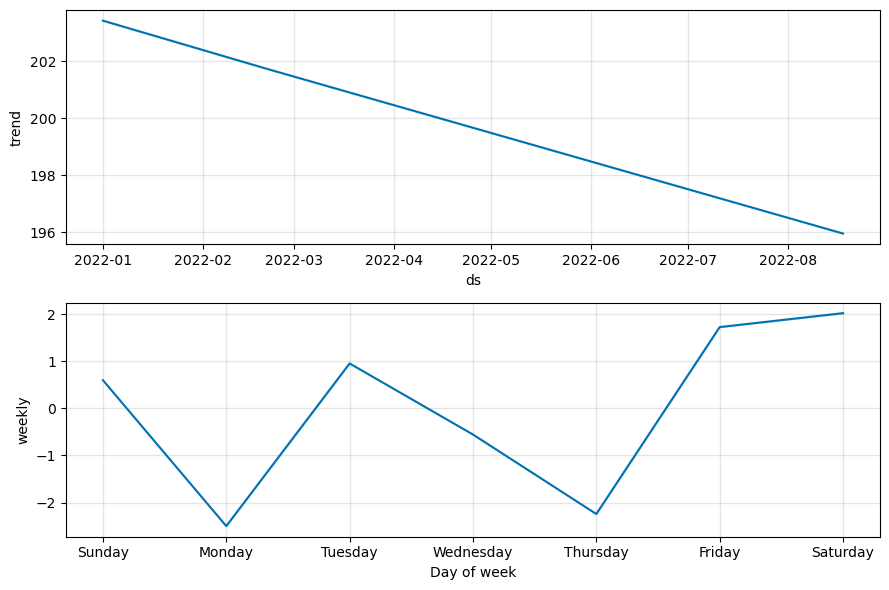

In [8]:
model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

model.plot_components(forecast)
plt.show()


In [9]:
forecast.to_csv("sales_forecast_output.csv", index=False)
print("Forecast saved successfully!")


Forecast saved successfully!
